In [17]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# all of the imports
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import RidgeCV
import pickle 


%matplotlib inline

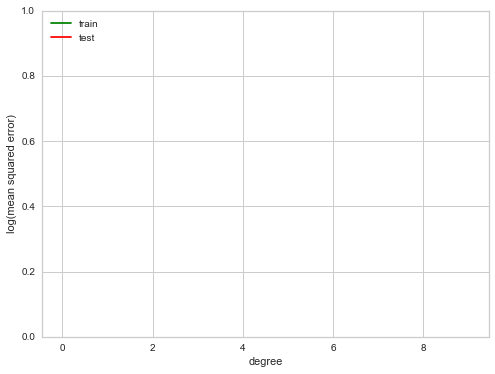

In [275]:
from sklearn.metrics import mean_squared_error

# Step through degrees from 0 to 9 and store the training and test (generalization) error.
train_error = np.empty(10)
test_error = np.empty(10)
for degree in range(10):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(10), train_error, color='green', label='train')
plt.plot(np.arange(10), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper left')

In [3]:
df = pd.read_csv('Obese_Model.csv')

In [4]:
df = df[['Percent_Obese','GDPper_cap','Insufficiently_active','HDI','Region_Africa','Region_Arab_States','Region_Europe','Region_Asia_Pacific','Region_Latin_America','Globalization_index','Urbanization_Rate','Urban_Population','Imports']]

In [5]:
df['log(Imports)'] = np.log(df['Imports'])
df['log(Imports)*Asia'] = df['log(Imports)']*df['Region_Asia_Pacific']
df['log(Urban_Population)'] = np.log(df['Urban_Population'])
df['Asia*Urbanization'] = df['Region_Asia_Pacific']*df['Urbanization_Rate'] 
df['UrbanPop*ArabStates'] = np.log(df['Urban_Population'])*df['Region_Arab_States']
df['Asia*Globalization'] = df['Region_Asia_Pacific']*df['Globalization_index']
df['Urbanization*GDPpercap'] = df['Urbanization_Rate']*df['GDPper_cap']
df['Europe*GDPpercap'] = df['Region_Europe']*df['GDPper_cap']

In [7]:
#df.head()
df.to_csv('Obese_model_data.csv')

In [8]:
y = df['Percent_Obese']
X = df[['Insufficiently_active','HDI','Region_Asia_Pacific','Urbanization_Rate','log(Imports)','log(Urban_Population)','Asia*Urbanization','UrbanPop*ArabStates','Asia*Globalization','Urbanization*GDPpercap','Europe*GDPpercap']]

In [9]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

0.68504071757987983

In [12]:
lr1 = LinearRegression()
model = lr1.fit(X_train, y_train)
lr1.score(X_train, y_train)

0.72627252655694507

In [14]:
scores = cross_val_score(model, X, y, cv=100, scoring='neg_mean_squared_error')
print('Stratified %i folds cross validation mean' + 'Folds: %i, mean squared error: %.2f std: %.2f'
%(len(scores),np.mean(np.abs(scores)),np.std(scores)))

Stratified %i folds cross validation meanFolds: 100, mean squared error: 41.34 std: 82.50


In [15]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score


enet = ElasticNet(alpha=0.01, l1_ratio=1)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.691156


In [18]:
rcv = RidgeCV(cv=10)
rcv.fit(X_train, y_train)
rcv.score(X_test, y_test)

0.69820743476561309

In [19]:
rcv.score(X_train, y_train)

0.71993455411333995

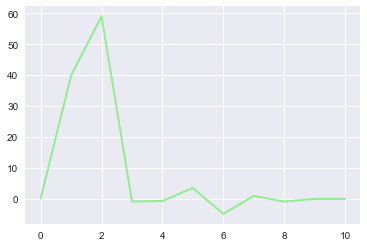

In [20]:
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = rcv.predict(X_test)

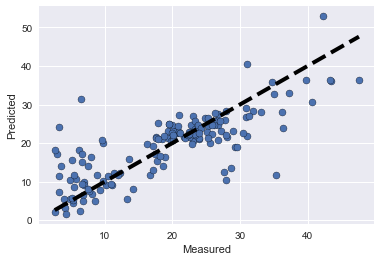

In [24]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(rcv, X, y, cv=100)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

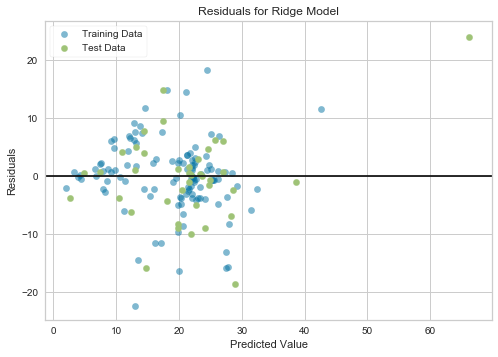

In [239]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import LassoCV

ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()        

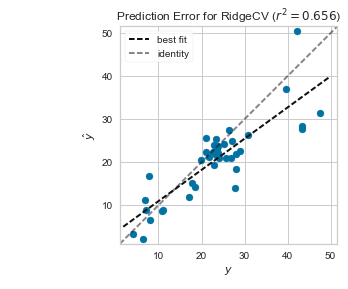

In [273]:
from yellowbrick.regressor import ManualAlphaSelection
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(rcv)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 